# CareerERA Invenstment VC Capstone Project

In [1]:
from dataclasses import dataclass
import calendar
import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

from sklearn.metrics import (
    accuracy_score, auc, classification_report, f1_score, make_scorer,
    mean_squared_error, precision_score, recall_score, roc_curve)

warnings.filterwarnings('ignore')

## Import data file

The file kept returning unicode errors, so needed speacial handling while loading.

In [2]:
df = pd.read_csv('data/investments_VC.csv', engine='python', encoding='unicode_escape')
df.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0              0.0                   0.0     0.0     0.0     0.0      0.0   
1              0.0                   0.0     0.0     0.0     0.0      0.0   
2              0.0                   0.0     0.0     0.0     0.0      0.0   
3              0.0                   0.0     0.0     0.0     0.0      0.0   
4              0.0                   0.0     0.0     0.0     0.0      0.0   

  round_E round_F  round_G  round_H  
0     0.0     0.0      0.0      0.0  
1     0.0     0.0      0.0      0.0  
2     0.0     0.0      0.0      0.0  
3     0.0     0.0      0.0      0.0  
4     0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

## Data Cleanup

Let's explore the data further and see what we are dealing with.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [4]:
df.shape

(54294, 39)

As can be seen here, the dataset consists of 54,294 rows and 39 columns.

There's a lot of data here, let's see if there are any duplicate entries.

In [5]:
# check for duplicate rows
print(df.duplicated().sum())

4855


Wow, there were quite a bit of duplicate rows!

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(49439, 39)

In [7]:
df.isnull().sum()

permalink                   1
name                        2
homepage_url             3450
category_list            3962
 market                  3969
 funding_total_usd          1
status                   1315
country_code             5274
state_code              19278
region                   5274
city                     6117
funding_rounds              1
founded_at              10885
founded_month           10957
founded_quarter         10957
founded_year            10957
first_funding_at            1
last_funding_at             1
seed                        1
venture                     1
equity_crowdfunding         1
undisclosed                 1
convertible_note            1
debt_financing              1
angel                       1
grant                       1
private_equity              1
post_ipo_equity             1
post_ipo_debt               1
secondary_market            1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C   

In [8]:
df.dropna(axis=0, how='all', inplace=True)

### Let's take a look at the column names

In [9]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

There appears to be empty spaces in some of the column names, let's clean those up.

In [10]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [11]:
df.isnull().sum()

permalink                   0
name                        1
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd           0
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

## Fill in missing name

Let's take a look at the row with no name.

In [12]:
df.loc[df['name'].isnull()]

permalink name           homepage_url category_list  \
28221  /organization/tell-it-in  NaN  http://tellitin10.com    |Startups|   

           market funding_total_usd  status country_code state_code region  \
28221   Startups            25,000   closed          NaN        NaN    NaN   

       ... secondary_market  product_crowdfunding round_A round_B round_C  \
28221  ...              0.0                   0.0     0.0     0.0     0.0   

       round_D round_E round_F  round_G  round_H  
28221      0.0     0.0     0.0      0.0      0.0  

[1 rows x 39 columns]

Let's add a name to it.

In [13]:
df['name'].fillna(df.iloc[28221].homepage_url.split('.')[0].replace('http://', '').title(), inplace=True)
df.dropna(subset=['permalink'], inplace=True)

## Examine the data

Let's take a look at the first row, to get a better sense of what each feature represents.

In [14]:
df.iloc[0]

permalink                                    /organization/waywire
name                                                      #waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
market                                                       News 
funding_total_usd                                       17,50,000 
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                 1.0
founded_at                                              2012-06-01
founded_month                                              2012-06
founded_quarter                                            201

First thing that I notice is the placement of those commas in the dollar amount in funding_total_usd. Let's clean that up.

In [15]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: x.strip().replace(',', '') if isinstance(x, str) else x)
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: 0.0 if x == '-' else float(x))

In [16]:
df.iloc[0]

permalink                                    /organization/waywire
name                                                      #waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
market                                                       News 
funding_total_usd                                        1750000.0
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                 1.0
founded_at                                              2012-06-01
founded_month                                              2012-06
founded_quarter                                            201

## A closer look at the date fields

In [17]:
df.founded_year

0        2012.0
1           NaN
2        2012.0
3        2011.0
4        2014.0
          ...  
49433    2013.0
49434       NaN
49435    2012.0
49436       NaN
49437    1999.0
Name: founded_year, Length: 49438, dtype: float64

In [18]:
df.first_funding_at

0        2012-06-30
1        2010-06-04
2        2012-08-09
3        2011-04-01
4        2014-08-17
            ...    
49433    2014-03-24
49434    2012-04-01
49435    2011-11-01
49436    2011-11-21
49437    2008-06-01
Name: first_funding_at, Length: 49438, dtype: object

In [19]:
df.founded_quarter

0        2012-Q2
1            NaN
2        2012-Q4
3        2011-Q2
4        2014-Q1
          ...   
49433    2013-Q1
49434        NaN
49435    2012-Q2
49436        NaN
49437    1999-Q1
Name: founded_quarter, Length: 49438, dtype: object

In [20]:
df.founded_month

0        2012-06
1            NaN
2        2012-10
3        2011-04
4        2014-01
          ...   
49433    2013-01
49434        NaN
49435    2012-05
49436        NaN
49437    1999-01
Name: founded_month, Length: 49438, dtype: object

In [21]:
df.founded_at

0        2012-06-01
1               NaN
2        2012-10-26
3        2011-04-01
4        2014-01-01
            ...    
49433    2013-01-28
49434           NaN
49435    2012-05-13
49436           NaN
49437    1999-01-01
Name: founded_at, Length: 49438, dtype: object

Looks like some of these could be cleaned up a bit. Also noticed that `founded_at` was mising more values than the others.

In [22]:
df['founded_month'] = pd.to_datetime(df.founded_month, format='%Y-%m').dt.to_period('M')
df['founded_quarter'] = df.founded_quarter.apply(lambda x: str(x.split('-')[1]) if isinstance(x, str) else x)
df['founded_at'] = pd.DatetimeIndex(df['founded_year']).year
df = df[df.founded_year.notna()]
df['founded_year'] = df.founded_year.astype(int)

In [23]:
df.founded_year

0        2012
2        2012
3        2011
4        2014
5        2011
         ... 
49430    1994
49432    2007
49433    2013
49435    2012
49437    1999
Name: founded_year, Length: 38482, dtype: int64

## A closer look at the category list

In [24]:
df.category_list

0               |Entertainment|Politics|Social Media|News|
2                                   |Publishing|Education|
3        |Electronics|Guides|Coffee|Restaurants|Music|i...
4                            |Tourism|Entertainment|Games|
5                                               |Software|
                               ...                        
49430                                      |Biotechnology|
49432                                      |Biotechnology|
49433    |Analytics|Gamification|Developer APIs|iOS|And...
49435        |Web Development|Advertising|Wireless|Mobile|
49437                                |Enterprise Software|
Name: category_list, Length: 38482, dtype: object

## Top Category List

In [25]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('nan')

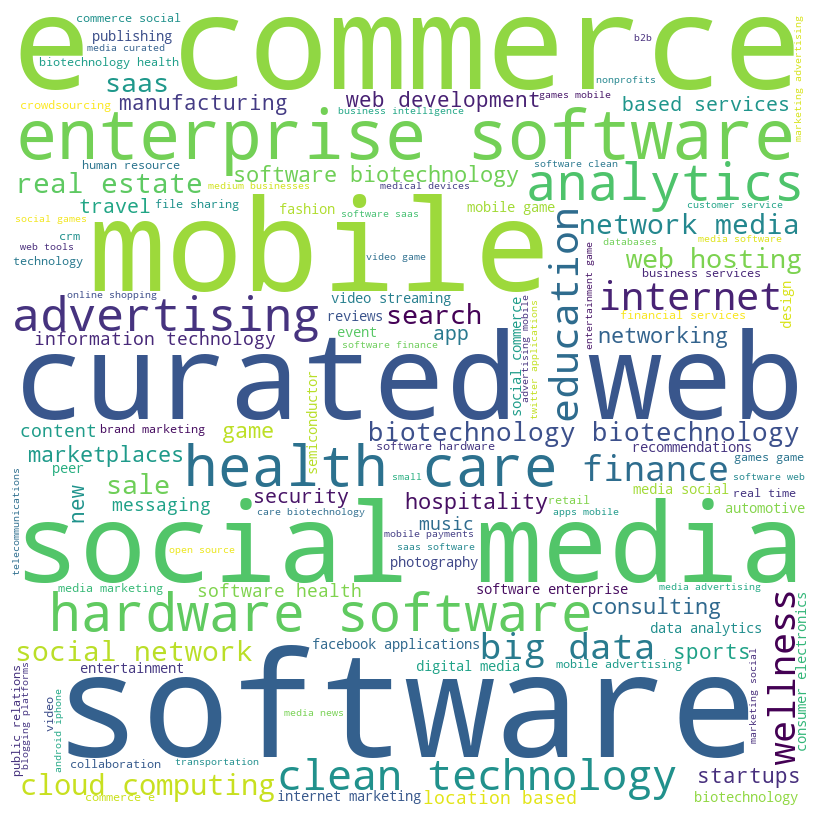

In [26]:
categories = ''
for category in df.category_list:
    category = str(category)
    tokens = category.split('|')
    tokens = [token.lower() for token in tokens]
    if len(tokens) == 2:
        if tokens[0] == tokens[1]:
            tokens = [tokens[0]]
    categories += " ".join(tokens) + " "

cwc = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords = stopwords,
    min_font_size=10,
).generate(categories)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cwc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot: >

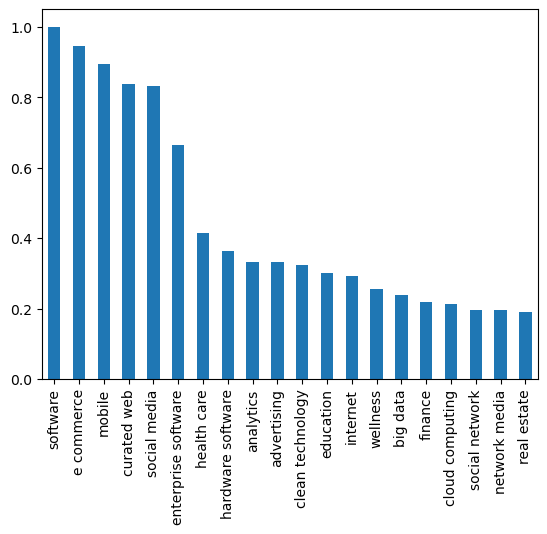

In [27]:
pd.DataFrame(cwc.words_, index=np.arange(len(cwc.words_))).iloc[0, :20].plot(kind='bar')

## Feature Engineering

Let's clean them up and create features from them.

In [28]:
df['category_list'] = df.category_list.apply(lambda x: str(x).lstrip('|').rstrip('|').split('|'))
df['category_list'] = df.category_list.apply(lambda x: [c.replace(' ', '_').lower() for c in x])
df['category_list'] = df.category_list.apply(lambda x: [c.strip() for c in x])

In [29]:
cat_dummies = pd.get_dummies(df.category_list.apply(pd.Series).stack()).sum(level=0)
df = pd.concat([df, cat_dummies], axis=1)
df.drop(['category_list'], axis=1, inplace=True)
df.shape

(38482, 852)

Let's add a feature to see how many days it took a company to get funding.

In [30]:
dt_objects = ['founded_at', 'first_funding_at', 'last_funding_at']
for d in dt_objects:
    df[d] = pd.to_datetime(df[d], errors='coerce')

In [31]:
df['days_to_funding'] = (df.first_funding_at - df.founded_at).dt.days

Let's take a closer look at `status`.

In [32]:
df.status.unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [33]:
df['status'].fillna('pending', inplace=True)

Out of all of the columns that are objects, let's see which might be better off as being considered categories.

In [34]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column}: {len(df[column].unique())}')

permalink: 38481
name: 38436
homepage_url: 36266
market: 736
status: 4
country_code: 111
state_code: 62
region: 1006
city: 3636
founded_quarter: 4


Turn categorical values into categories.

In [35]:
categorical = ['market', 'status', 'country_code', 'state_code', 'founded_month', 'founded_quarter', 'founded_year']
df[categorical] = df[categorical].astype('category')

In [36]:
for column in df.columns:
    if df[column].dtype == 'category':
        print(f'{column}: {len(df[column].unique())}')

market: 736
status: 4
country_code: 111
state_code: 62
founded_month: 420
founded_quarter: 4
founded_year: 103


Let's turn these into features as well.

### Manual One-Hot-Encoding

In [37]:
def ohe(df, feature, prefix=None, drop=True):
    if prefix is None:
        dummies = pd.get_dummies(df[feature], drop_first=True)
    else:
        dummies = pd.get_dummies(df[feature], drop_first=True, prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    if drop:
        df = df.drop([feature], axis=1)
    return df

In [38]:
df['month_founded'] = df.founded_month.apply(lambda x: str(x).rsplit('-')[1])
df['month_founded'].fillna(0, inplace=True)
df['month_founded'] = df.month_founded.astype(int)
df['month_founded'] = df.month_founded.apply(lambda x: calendar.month_abbr[x])
df = df.drop(['founded_month'], axis=1)

df = ohe(df, 'month_founded', 'month')
df = ohe(df, 'founded_quarter', 'quarter', False)
df = ohe(df, 'state_code', 'state', False)
df = ohe(df, 'founded_year', 'year', False)

### Time between the first and last funding rounds

In [39]:
df['funding_days'] = df.last_funding_at - df.first_funding_at
df['funding_days'] = df.funding_days.apply(lambda x: x.days)

### Get rid of null values

In [40]:
def show_nulls(df):
    temp = df.isna().sum()
    temp = temp[temp != 0].sort_values(ascending=False)
    display(temp)

In [41]:
show_nulls(df)

state_code          13764
city                 3470
country_code         3031
region               3031
homepage_url         2139
market               1982
first_funding_at        6
days_to_funding         6
funding_days            6
last_funding_at         2
dtype: int64

In [42]:
nulls = [
    'market',
    'city',
    'days_to_funding',
    'funding_days',
]
df.dropna(subset=nulls, inplace=True)

### Cleanup market names

In [43]:
df['market'] = df.market.apply(lambda x: x.strip().lower())

## Save the processed data

In [44]:
df.to_csv('data/cleaned_data.csv', index=False)

## EDA

In [45]:
# Find the average funding total for all companies
avg_funding = df['funding_total_usd'].mean()
print(f"The average funding total for all companies is: ${avg_funding:,.2f}")

The average funding total for all companies is: $15,108,624.10


In [46]:
# Find the number of companies in each funding round
funding_sources = [
    'seed',
    'venture',
    'equity_crowdfunding',
    'undisclosed',
    'convertible_note',
    'debt_financing',
    'angel',
    'grant',
    'private_equity',
    'post_ipo_equity',
    'post_ipo_debt',
    'secondary_market',
    'product_crowdfunding',
    'round_A',
    'round_B',
    'round_C',
    'round_D',
    'round_E',
    'round_F',
    'round_G',
    'round_H',
]
round_counts = df[funding_sources].sum()
print("Number of companies in each funding round:")
print(round_counts)

Number of companies in each funding round:
seed                    8.655835e+09
venture                 3.023020e+11
equity_crowdfunding     2.143017e+08
undisclosed             3.074962e+09
convertible_note        9.062818e+08
debt_financing          7.343022e+10
angel                   2.482532e+09
grant                   4.882356e+09
private_equity          7.734722e+10
post_ipo_equity         2.052542e+10
post_ipo_debt           9.717065e+09
secondary_market        1.141072e+09
product_crowdfunding    2.811953e+08
round_A                 4.787397e+10
round_B                 6.209196e+10
round_C                 5.237472e+10
round_D                 3.361075e+10
round_E                 1.570952e+10
round_F                 8.057773e+09
round_G                 2.747816e+09
round_H                 6.990000e+08
dtype: float64


In [47]:
# Find the number of companies founded in each year
year_counts = df['founded_year'].value_counts()
print("Number of companies founded in each year:")
print(year_counts)

Number of companies founded in each year:
2012    4382
2011    4281
2010    3286
2013    3187
2009    2653
        ... 
1941       1
1902       1
1936       0
1907       0
1905       0
Name: founded_year, Length: 103, dtype: int64


In [48]:
# describe the dataset
print(df.describe())

       funding_total_usd  funding_rounds          seed       venture  \
count       3.342200e+04    33422.000000  3.342200e+04  3.342200e+04   
mean        1.510862e+07        1.875142  2.589862e+05  9.044999e+06   
std         1.790742e+08        1.436694  9.947027e+05  3.297736e+07   
min         0.000000e+00        1.000000  0.000000e+00  0.000000e+00   
25%         1.087750e+05        1.000000  0.000000e+00  0.000000e+00   
50%         1.370073e+06        1.000000  0.000000e+00  0.000000e+00   
75%         8.500000e+06        2.000000  5.000000e+04  6.194501e+06   
max         3.007950e+10       18.000000  1.000000e+08  2.351000e+09   

       equity_crowdfunding   undisclosed  convertible_note  debt_financing  \
count         3.342200e+04  3.342200e+04      3.342200e+04    3.342200e+04   
mean          6.411994e+03  9.200413e+04      2.711632e+04    2.197063e+06   
std           1.795643e+05  2.184849e+06      1.682261e+06    1.664993e+08   
min           0.000000e+00  0.000000e+0

In [49]:
# check the distribution of values in the 'status' column
print(df['status'].value_counts())

operating    28311
acquired      2747
closed        1702
pending        662
Name: status, dtype: int64


In [50]:
# check the correlation between funding rounds and funding total
print(df[['funding_rounds','funding_total_usd']].corr())

                   funding_rounds  funding_total_usd
funding_rounds            1.00000            0.11401
funding_total_usd         0.11401            1.00000


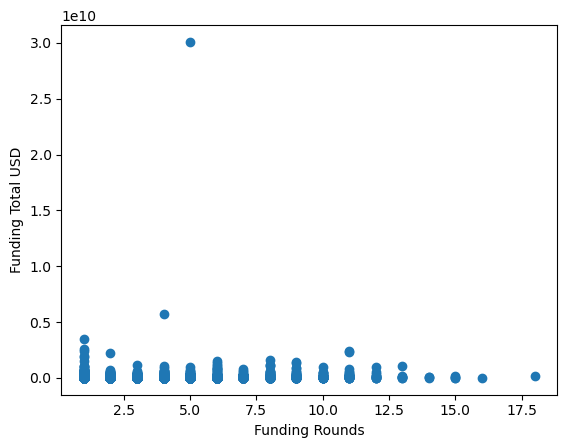

In [51]:
# visualize the relationship between funding rounds and funding total
import matplotlib.pyplot as plt
plt.scatter(df['funding_rounds'], df['funding_total_usd'])
plt.xlabel('Funding Rounds')
plt.ylabel('Funding Total USD')
plt.show()

## Top market categories

In [52]:
market_counts = df['market'].value_counts()
print("Number of companies in each market:")
print(market_counts)

Number of companies in each market:
software          3564
biotechnology     2391
mobile            1438
e-commerce        1284
curated web       1161
                  ... 
veterinary           0
china internet       0
rural energy         0
theatre              0
recreation           0
Name: market, Length: 735, dtype: int64


There's way too many to look at, let's look at the top 20.

In [53]:
top_20_markets_df = pd.DataFrame(market_counts[:20]).reset_index()
top_20_markets_df.columns = ['market', 'counts']
top_20_markets_df.head()

market  counts
0       software    3564
1  biotechnology    2391
2         mobile    1438
3     e-commerce    1284
4    curated web    1161

In [54]:
fig1 = px.bar(top_20_markets_df, x='market', y='counts', color='counts', height=600)
fig1.show()

From this graph we can clearly see which markets are the most popular across the world, with **Software** and **Biotechnology** at the forefront.

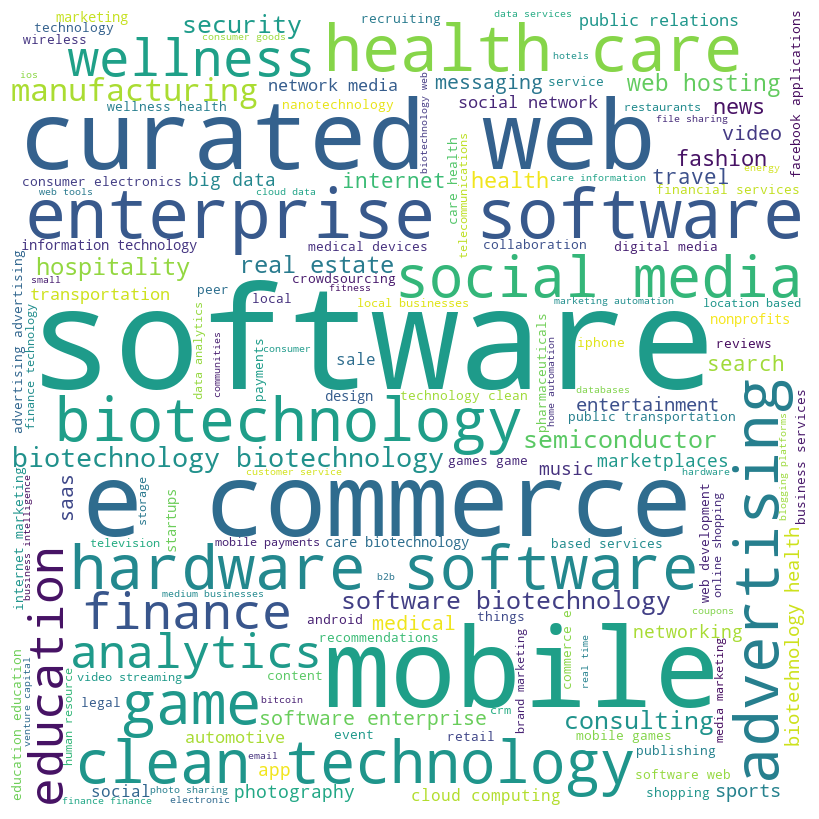

In [55]:
market_words = ''
for word in df.market:
    word = str(word)
    tokens = word.split()
    tokens = [token.lower() for token in tokens]
    if len(tokens) == 2:
        if tokens[0] == tokens[1]:
            tokens = [tokens[0]]
    market_words += " ".join(tokens) + " "

wc = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords = stopwords,
    min_font_size=10,
).generate(market_words)

fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
# fig.savefig('market-wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

<AxesSubplot: >

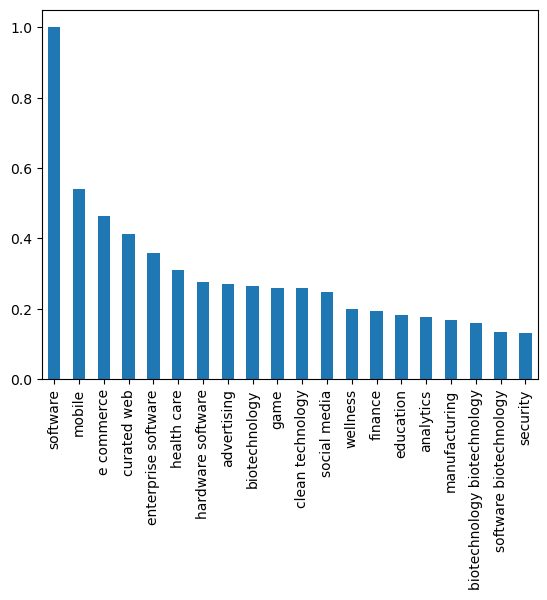

In [56]:
pd.DataFrame(wc.words_, index=np.arange(len(cwc.words_))).iloc[0, :20].plot(kind='bar')

## Markets receiving the most funding

### Highest funded markets

In [57]:
markets_df = pd.DataFrame(df[['market', 'funding_total_usd']])
markets_df['funding_total_usd'].quantile([0.0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

0.00    0.000000e+00
0.25    1.087000e+05
0.50    1.370000e+06
0.75    8.500000e+06
1.00    3.007950e+10
Name: funding_total_usd, dtype: float64

In [58]:
markets_df['funding_total_usd'].sample(10)

22203       25000.0
46183           0.0
29152     6175029.0
9183      3000000.0
39409     7500000.0
23931    10000000.0
33327      293900.0
28785      943101.0
16293      129278.0
2312     72000000.0
Name: funding_total_usd, dtype: float64

In [59]:
markets_df = pd.DataFrame(df[['market', 'funding_total_usd']])

In [60]:
market_data = markets_df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False)
market_data.head()

market
biotechnology       5.363048e+10
mobile              4.577465e+10
software            3.664565e+10
clean technology    2.613973e+10
health care         2.295607e+10
Name: funding_total_usd, dtype: float64

In [61]:
fig2 = px.bar(
    market_data[:20],
    x= market_data[:20].index,
    y='funding_total_usd',
    color='funding_total_usd',
    height=600,
    title="Top 20 Funded Markets",
    labels=dict(funding_total_usd="Funding Total ($)", x="Market"),
)
fig2.update_traces(hovertemplate='%{y:$,.2f}'),
fig2.show()

Here we can see how much funding each of the market sectors has received, with **Biotechnology** leading the pack at $53 billion dollars.

### Highest funded companies

In [62]:
campanies_df = pd.DataFrame(df[['name', 'funding_total_usd']])
company_data = campanies_df.groupby('name')['funding_total_usd'].sum().sort_values(ascending=False)
company_data.head()

name
Verizon Communications    3.007950e+10
Clearwire                 5.700000e+09
First Data Corporation    3.500000e+09
sigmacare                 2.600000e+09
Facebook                  2.425700e+09
Name: funding_total_usd, dtype: float64

In [63]:
fig3 = px.bar(
    company_data[:20],
    x= company_data[:20].index,
    y='funding_total_usd',
    color='funding_total_usd',
    height=600,
    title="Top 20 Funded Companies",
    labels=dict(funding_total_usd="Funding Total ($)", x="Companies"),
)
fig3.update_traces(hovertemplate='%{y:$,.2f}'),
fig3.show()

Wow, $30 billion dollars is a lot of funding going towards **Verizon Communications**!

## Startup status

In [64]:
status_df = pd.DataFrame(df['status'].value_counts())
status_df

status
operating   28311
acquired     2747
closed       1702
pending       662

In [65]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig4 = go.Figure(
    data=[
        go.Pie(
            labels=status_df.index,
            values=status_df.status,
            pull=[0.2, 0, 0, 0],
        ),
    ],
)
fig4.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='#000000', width=1)),
)
fig4.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig4.show()

Looks like the companies that are receiving most of the funding are **operational**.

In [66]:
def generate_dfs():
    dfs = []
    for status in df.status.unique():
        tmp_df = df.query(f'status == "{status}"')
        tmp_df.attrs['name'] = status
        dfs.append(tmp_df)
    return dfs

## Startup investments in the United States by state

In [67]:
@dataclass
class Country:
    country: str
    scope: str
    locationmode:str
    title: str


def plot_map(config: Country):
    country = config.country
    scope = config.scope
    locationmode = config.locationmode
    title = config.title
    
    _df = df.query(f'country_code == "{country}"')['state_code']
    _df = _df.value_counts().to_frame()
    _df.reset_index(inplace=True)
    _df.rename(columns={'index': 'state_code', 'state_code': 'count'}, inplace=True)

    fig = go.Figure(
        data=go.Choropleth(
            locations=_df.state_code,
            z=_df['count'].astype(int),
            locationmode=locationmode,
            colorscale='darkmint',
            colorbar_title="Startup Counts",
        ),
    )
    fig.update_layout(
        title_text=title,
        geo_scope=scope,
        height=500,
    )

    fig.show()
    return _df

In [68]:
country = 'USA'
scope = country.lower()
locationmode = f'{country}-states'
title = f'{country}: Startup Investment Counts by State'
usa = Country(country, scope, locationmode, title)

usa_df = plot_map(usa)

**California** by far has the most startups at over **8k**!

## Funding by status stage

How much funding has gone into each stage for each state?

In [69]:
tmp_df = df.query('country_code == "USA"')[['state_code', 'status', 'funding_total_usd']]
state_funding_df = tmp_df.groupby(['state_code', 'status'])['funding_total_usd'].sum().to_frame()
state_funding_df.reset_index(inplace=True)

fig5 = px.treemap(
    state_funding_df,
    path=[px.Constant("USA"), 'state_code', 'status'],
    values='funding_total_usd',
    title='USA: States with the most funding',
    height=600,
)
fig5.update_traces(
    hovertemplate='<b>%{label}</b> <br> Funding: %{value:$,.2f}'),
fig5.show()

Interesting insight here is that **Washington's** *operating* startups are almost the same as its *aquired* ones.

## Funding rounds

Let's take a look at how many rounds of funding each of the stages received.

In [70]:
funding_rounds_df = df.groupby(['status', 'funding_rounds'])['name'].count().to_frame()
funding_rounds_df.rename(columns={'name': 'count'}, inplace=True)
funding_rounds_df.reset_index(inplace=True)

fig6 = px.bar(
    funding_rounds_df,
    x='status',
    y='count',
    color='funding_rounds',
    hover_data=['funding_rounds'],
    barmode='stack',
)
fig6.update_layout(height=600, width=800, title='Funding Rounds by Status')

fig6.show()

It's obvious now that the startups that are still operational are the ones that receive the most rounds of funding.

## What year where the most startups founded on

The data goes back pretty far and no significant changes are visible until the late 90's, so I've filtered out the older stuff.

In [71]:
newer_df = df[df.founded_year.astype(int) > 1990]
founded_counts = newer_df.groupby('founded_year')['name'].count().to_frame().reset_index()
# founded_counts.plot(x='year')
fig7 = px.line(founded_counts, x='founded_year', y='name')
fig7.update_traces(hovertemplate=None)
fig7.update_layout(
    xaxis_title='year',
    yaxis_title='startup count',
    height=600,
    width=600,
    title='Startup Count by Year',
    hovermode="x",
)
fig7.show()

The year **2012** was the year for startups, with **4,382**! It's been declining ever since.

### Startup Count by Quarter

In [72]:
founded_qcounts = newer_df.groupby('founded_quarter')['name'].count().to_frame().reset_index()

fig8 = px.bar(founded_qcounts, x='founded_quarter', y='name')
fig8.update_traces(hovertemplate=None)
fig8.update_layout(
    xaxis_title='year quarter',
    yaxis_title='startup count',
    height=600,
    width=800,
    title='Startup Count by Quarter per Year',
    hovermode="x",
)
fig8.show()

It's pretty interesting to see that the most startups are founded on the first quarter of each year.

## Startups that got funding within the first year

In [73]:
under_one_df = newer_df[(newer_df.funding_days > 0) & (newer_df.funding_days < 365) & (newer_df['funding_total_usd'] > 0)]
under_one_df = under_one_df[['name', 'market', 'funding_total_usd', 'status', 'country_code', 'funding_days']]
under_one_df.dropna(subset=['market', 'country_code'], inplace=True)
under_one_df.sort_values(by=['funding_days', 'funding_total_usd'], ascending=[True, False], inplace=True)
under_one_df.reset_index(drop=True, inplace=True)
under_one_df.head()

name              market  funding_total_usd  \
0  NorthStar Systems International            software         29500000.0   
1                         Levicept       biotechnology         19913173.0   
2                    D3 Technology  financial services         14000000.0   
3                          HiWired            software         14000000.0   
4                         dloHaiti    clean technology          6769900.0   

      status country_code  funding_days  
0   acquired          USA           1.0  
1  operating          GBR           1.0  
2  operating          USA           1.0  
3   acquired          USA           1.0  
4  operating          USA           1.0

Here's the top 20 companies that received the most funding within the first year.

In [74]:
under_one_df.head(20)

name                market  funding_total_usd  \
0   NorthStar Systems International              software         29500000.0   
1                          Levicept         biotechnology         19913173.0   
2                     D3 Technology    financial services         14000000.0   
3                           HiWired              software         14000000.0   
4                          dloHaiti      clean technology          6769900.0   
5                            Scopix                retail          5642292.0   
6    E-Health Records International   health and wellness          3043610.0   
7                    Eagle Genomics         biotechnology          2136504.0   
8                             Hatch    mass customization          1650000.0   
9        Pinnacle Medical Solutions           health care          1500000.0   
10              One Exchange Street  e-commerce platforms          1000000.0   
11                        Sendmebox            e-commerce           328571.0   
12     Nitinol Devices & Components           health care         40000000.0   
13                       U4iA Games                mobile          7030928.0   
14               Kilimanjaro Energy      clean technology          3150000.0   
15                 Caustic Graphics   hardware + software          3099200.0   
16                      Motion Math                 games           500000.0   
17                          Otogami           video games           450000.0   
18                          trinket             education           425000.0   
19                         Winerist            technology           360000.0   

       status country_code  funding_days  
0    acquired          USA           1.0  
1   operating          GBR           1.0  
2   operating          USA           1.0  
3    acquired          USA           1.0  
4   operating          USA           1.0  
5   operating          USA           1.0  
6   operating          USA           1.0  
7   operating          GBR           1.0  
8   operating          USA           1.0  
9   operating          USA           1.0  
10  operating          USA           1.0  
11  operating          RUS           1.0  
12    pending          USA           2.0  
13  operating          USA           2.0  
14  operating          USA           2.0  
15  operating          USA           2.0  
16  operating          USA           2.0  
17  operating          ESP           2.0  
18  operating          USA           2.0  
19  operating          USA           2.0

In [75]:
fig9 = px.scatter_geo(
    under_one_df,
    locations='country_code',
    color='country_code',
    hover_name='country_code',
    # size='funding_total_usd',
    animation_frame='funding_days',
    projection='mercator',
    # projection='natural earth2',
    # projection='orthographic',
    hover_data={
        'country_code': False,
        'funding_total_usd': ':$,.0f',
        'funding_days': ':,0f',
    },
)
fig9.update_layout(
    height=600,
    width=800,
    title='Startup Count by Quarter per Year',
)
fig9.show()

In [76]:
show_nulls(df)

state_code      9777
homepage_url    1599
dtype: int64

In [77]:
nonull_df = df.drop(['homepage_url', 'state_code'], axis=1)
show_nulls(nonull_df)

Series([], dtype: int64)

In [78]:
numeric = [feature for feature in nonull_df.columns if nonull_df[feature].dtype == 'float']
categorical = [feature for feature in nonull_df.columns if nonull_df[feature].dtype != 'float']

<AxesSubplot: xlabel='status', ylabel='Count'>

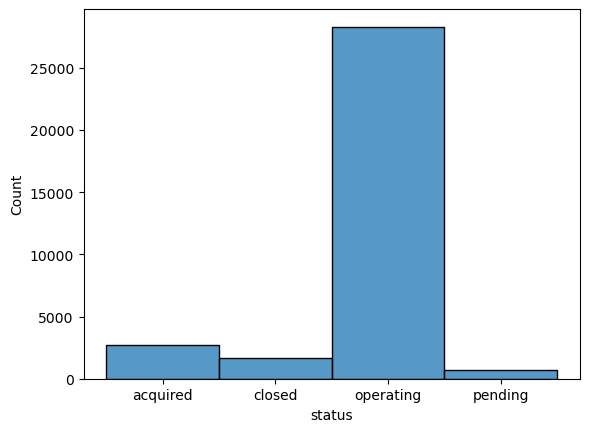

In [79]:
sns.histplot(nonull_df, x='status')

In [80]:
nonull_df.groupby('status')['status'].count()

status
acquired      2747
closed        1702
operating    28311
pending        662
Name: status, dtype: int64

> Status is going to be my target variable. I'm going to try and predict which startups get aquired, so here I'm going to change this featuer into binary for easier classification.

In [81]:
status_values = {
    'acquired': 1,
    'operating': 0,
    'pending': 0,
    'closed': 0,
}
nonull_df['status'] = nonull_df.status.map(status_values)
nonull_df.status.value_counts()

0    30675
1     2747
Name: status, dtype: int64

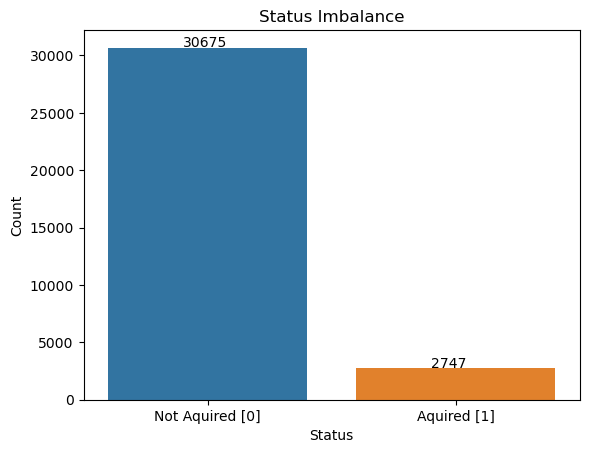

In [82]:
ax = sns.countplot(data=nonull_df, x='status')
ax.set(xlabel='Status', ylabel='Count', title='Status Imbalance', xticklabels=['Not Aquired [0]', 'Aquired [1]'])

for patch in ax.patches:
    ax.annotate(f'{int(patch.get_height())}', (patch.get_x() + 0.3, patch.get_height() + 50))

In [83]:
category_frequencies = []
column_names = cat_dummies.columns.to_list()
for name in column_names:
    cat = {'frequency': nonull_df[name].sum(), 'category': name}
    category_frequencies.append(cat)

category_frequencies = sorted(category_frequencies, key=lambda x: x['frequency'], reverse=True)

In [84]:
X = []
y = []
for cat in category_frequencies[:20]:
    X.append(cat['category'])
    y.append(cat['frequency'])

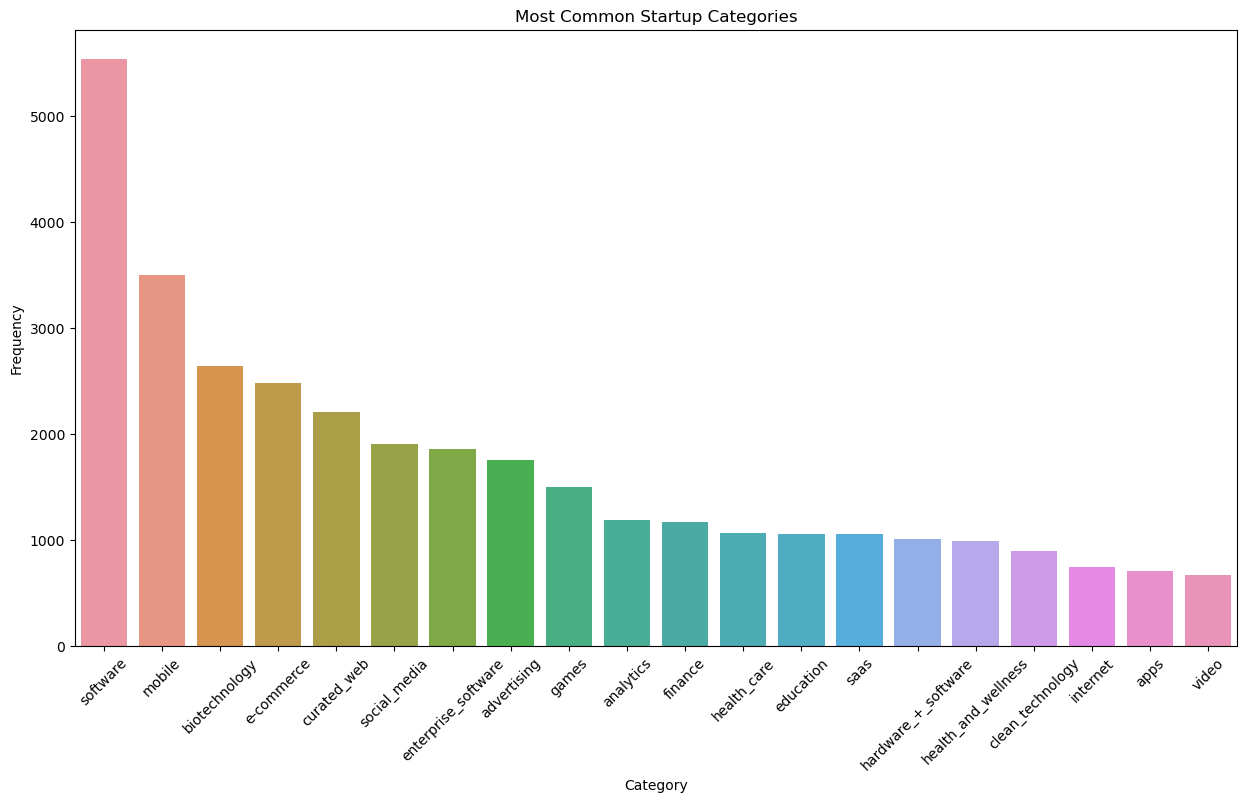

In [85]:
fig10, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=X, y=y)
ax.set(xlabel='Category', ylabel='Frequency', title='Most Common Startup Categories')
plt.xticks(rotation=45)
plt.show()

## Aquired startups funding

In [86]:
funding_types = [
    'seed',
    'venture',
    'equity_crowdfunding',
    'undisclosed',
    'convertible_note',
    'debt_financing',
    'angel',
    'grant',
    'private_equity',
    'post_ipo_equity',
    'post_ipo_debt',
    'secondary_market',
    'product_crowdfunding',
    'round_A',
    'round_B',
    'round_C',
    'round_D',
    'round_E',
    'round_F',
    'round_G',
    'round_H',
]
aquired = nonull_df[nonull_df.status == 1]
funds = [aquired[fund].sum() for fund in funding_types]
dollars = [f'${f:,.2f}' for f in funds]

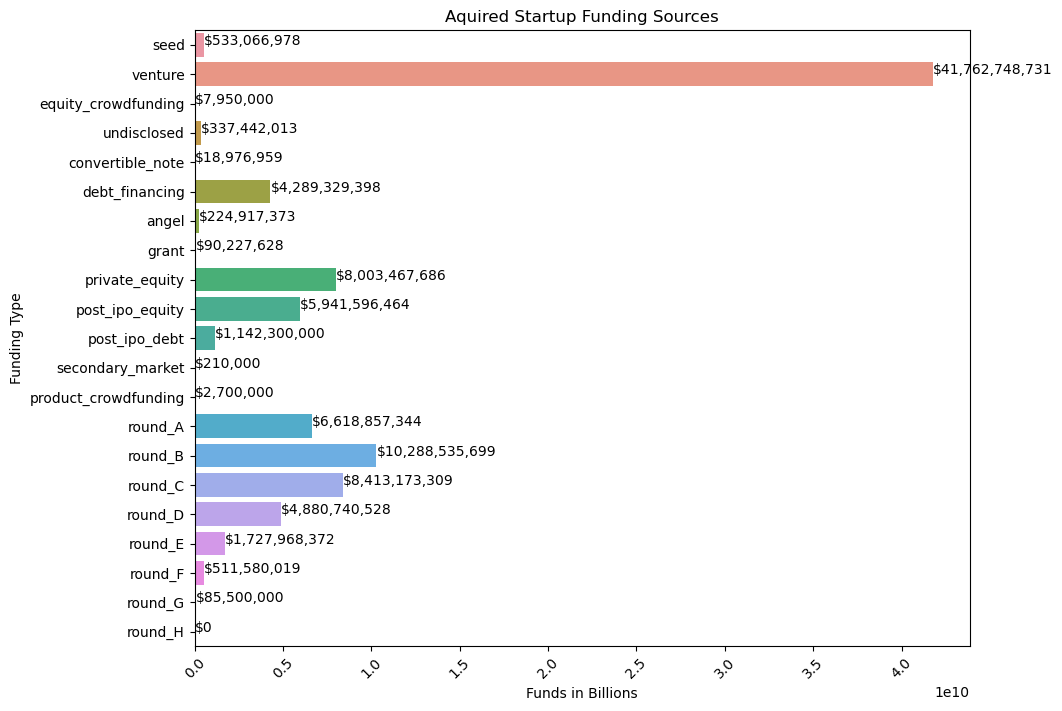

In [87]:
fig11, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=funds, y=funding_types, orient='h')
ax.set(xlabel='Funds in Billions', ylabel='Funding Type', title='Aquired Startup Funding Sources')

for patch in ax.patches:
    _x = patch.get_x() + patch.get_width()
    _y = patch.get_y() + patch.get_height() / 2
    value = f'${patch.get_width():,.0f}'
    ax.text(_x, _y, value, ha='left')

plt.xticks(rotation=45)
plt.show()

With this being a VC dataset, it's no surprise that most of the funding for startup companies comes from venture capitalists.

## Prepare data for modeling

In [88]:
import joblib

import xgboost as xgb
from imblearn.over_sampling import SMOTE
from ray.util.joblib import register_ray
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.utils import parallel_backend, resample

## Train, Test, Val Split + Feature scaling + OHE

Remove features that we don't need like the datetime features is not supported by DictVectorizer, target feature, and others.

In [89]:
remove_cat = [
    'permalink',
    'status',
    'founded_at',
    'first_funding_at',
    'last_funding_at',
]
for feature in remove_cat:
    categorical.remove(feature)

In [90]:
# create train, test, val splits
df_train_full, df_test = train_test_split(nonull_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

del df_train['status']
del df_val['status']
del df_test['status']

In [91]:
# scale the numeric features
scaler = StandardScaler()

X_train_num = df_train[numeric].values
X_train_num = scaler.fit_transform(X_train_num)

# one hot encode categorical featuers
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(df_train[categorical].values)
X_train = np.column_stack([X_train_num, X_train_cat])

In [92]:
ohe.get_feature_names_out()

array(['x0_#waywire', "x0_'Rock' Your Paper", 'x0_(In)Touch Network', ...,
       'x995_1', 'x996_0', 'x996_1'], dtype=object)

## Score Keeper DataFrame and Function

I like to use this to keep track of my classifier and they metrics.

In [93]:
columns = ['classifier', 'accuracy', 'precision', 'recall', 'f1-score']
clf_scores = pd.DataFrame(columns=columns)


def score_keeper(clf, y_true, y_pred):
    global clf_scores
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    scores = {
        'classifier': clf,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
    }
    clf_scores = clf_scores.append(scores, ignore_index=True)

## Baseline Logistic Regression Classifier

In [94]:
baseline = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
baseline.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [95]:
X_val_num = df_val[numeric].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)
X_val = np.column_stack([X_val_num, X_val_cat])

y_pred = baseline.predict(X_val)
score_keeper('BaseLine-LR', y_val, y_pred)
clf_scores[clf_scores.classifier == 'BaseLine-LR']

classifier  accuracy  precision    recall  f1-score
0  BaseLine-LR  0.913538     0.6276  0.531497  0.539383

## Handle class imbalance

Wow, 91% accuracy! Not so fast. With the target variable being so imbalanced, this metric is very deceiving. Let's try and handle the class imbalance in two ways. First I will downsample the not aquired records down to match the aquired ones. Then I will upscale the aquired ones to 5000 and downsample the not aquired ones down to the same amount. At the end, I will compare all of the models and chose the bet one out of them.

## Downsampled Dataset

In [96]:
a_down = nonull_df[nonull_df.status == 1]
na_down = nonull_df[nonull_df.status == 0]
na_downsampled = resample(
    na_down,
    replace=True,
    n_samples = len(a_down),
    random_state=42,
)
down_df = pd.concat([a_down, na_downsampled])
down_df.status.value_counts()

1    2747
0    2747
Name: status, dtype: int64

### Train, Validation, and Test Set Split Function

In [97]:
def ds_splits(df, categorical, numeric):
    # create train, test, val splits
    df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.status.values
    y_val = df_val.status.values
    y_test = df_test.status.values

    del df_train['status']
    del df_val['status']
    del df_test['status']

    # scale the numeric features
    scaler = StandardScaler()

    X_train_num = df_train[numeric].values
    X_train_num = scaler.fit_transform(X_train_num)

    X_val_num = df_val[numeric].values
    X_val_num = scaler.transform(X_val_num)

    X_test_num = df_test[numeric].values
    X_test_num = scaler.transform(X_test_num)

    # one hot encode categorical featuers
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

    X_train_cat = ohe.fit_transform(df_train[categorical].values)
    X_train = np.column_stack([X_train_num, X_train_cat])

    X_val_cat = ohe.transform(df_val[categorical].values)
    X_val = np.column_stack([X_val_num, X_val_cat])

    X_test_cat = ohe.transform(df_test[categorical].values)
    X_test = np.column_stack([X_test_num, X_test_cat])
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [98]:
X_train_d, X_val_d, X_test_d, y_train_d, y_val_d, y_test_d = ds_splits(down_df, categorical, numeric)

### Gridsearch Function

In [99]:
def grid_search(X, y, param_grid, cv, estimator):
    gs = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
    with parallel_backend('threading'):
        gs.fit(X, y)
    return gs

## Logistic Regression - Downsampled

In [100]:
# estimator = LogisticRegression()
# param_grid = {
#     'solver': ['lbfgs', 'saga'],
#     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100],
#     'penalty': ['elasticnet'],
#     'max_iter': [100, 200, 300],
#     'l1_ratio': [0.1, 0.2, 0.3],
# }
# lr_gs = grid_search(X_train_d, y_train_d, param_grid, 3, estimator)

# print("Best parameters: ", lr_gs.best_params_)
# print("Best accuracy: ", lr_gs.best_score_)

print("Best parameters:  {'C': 100, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}")
print("Best accuracy:  0.7477166844587358")

Best parameters:  {'C': 100, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Best accuracy:  0.7477166844587358


In [101]:
lr_model = LogisticRegression(
    C=100,
    l1_ratio=0.1,
    max_iter=100,
    penalty='elasticnet',
    solver='saga',
)
lr_model.fit(X_train_d, y_train_d)

LogisticRegression(C=100, l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [102]:
y_pred = lr_model.predict(X_val_d)
score_keeper('LogisticRegression', y_val_d, y_pred)
clf_scores[clf_scores.classifier == 'LogisticRegression']

classifier  accuracy  precision    recall  f1-score
1  LogisticRegression  0.768881   0.768978  0.768967  0.768881

## KNeighborsClassifier - Downsampled

In [103]:
# estimator = KNeighborsClassifier()
# param_grid = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance']}

# knn_gs = grid_search(X_train_d, y_train_d, param_grid, 5, estimator)

# print("Best parameters: ", knn_gs.best_params_)
# print("Best accuracy: ", knn_gs.best_score_)

print("Best parameters:  {'n_neighbors': 5, 'weights': 'distance'}")
print("Best accuracy:  0.6937677217336093")

Best parameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best accuracy:  0.6937677217336093


In [104]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_d, y_train_d)

KNeighborsClassifier(weights='distance')

In [105]:
y_pred = knn_model.predict(X_val_d)
score_keeper('KNeighborsClassifier', y_val_d, y_pred)
clf_scores[clf_scores.classifier == 'KNeighborsClassifier']

classifier  accuracy  precision    recall  f1-score
2  KNeighborsClassifier  0.708826   0.709555  0.709089   0.70872

## Random Forest - Downsampled

In [106]:
# estimator = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }
# rf_gs = grid_search(X_train_d, y_train_d, param_grid, 5, estimator)

# print("Best parameters: ", rf_gs.best_params_)
# print("Best accuracy: ", rf_gs.best_score_)

print("Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}")
print("Best accuracy:  0.7492399044739937")

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.7492399044739937


In [107]:
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_model.fit(X_train_d, y_train_d)

RandomForestClassifier()

In [108]:
y_pred = rf_model.predict(X_val_d)
score_keeper('RandomForestClassifier', y_val_d, y_pred)
clf_scores[clf_scores.classifier == 'RandomForestClassifier']

classifier  accuracy  precision    recall  f1-score
3  RandomForestClassifier  0.797998     0.7986  0.798215  0.797961

## XGBoost - Downsampled

In [109]:
# estimator = xgb.XGBClassifier()
# param_grid = {
#     'nthread': [4],
#     'objective': ['binary:logistic'],
#     'learning_rate': [0.05],
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [11],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'n_estimators': [5, 100, 200, 300, 500], #number of trees, change it to 1000 for better results
#     'missing': [-999],
#     'seed': [42],
# }
# cv = cv=StratifiedKFold(shuffle=True, random_state=42)
# xgb_gs = grid_search(X_train_d, y_train_d, param_grid, cv, estimator)

# print("Best parameters: ", xgb_gs.best_params_)
# print("Best accuracy: ", xgb_gs.best_score_)

# GridSearchCV(
#     xgb_clf,
#     param_grid,
#     n_jobs=5, 
#     cv=StratifiedKFold(
#         shuffle=True,
#         random_state=42,
#     ),
#     scoring='roc_auc',
#     verbose=2,
#     refit=True,
# )
# with parallel_backend('threading'):
#     grid_search.fit(X_train_d, y_train_d)

print("Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 300, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}")
print("Best accuracy:  0.7682433748674252")

Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 300, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}
Best accuracy:  0.7682433748674252


In [110]:
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=11,
    missing=-999,
    n_estimators=300,
    nthread=4,
    objective='binary:logistic',
    seed=42,
    subsample=0.8,
    n_jobs=-1,
)
xgb_model.fit(X_train_d, y_train_d)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=11, missing=-999,
              monotone_constraints='()', n_estimators=300, n_jobs=-1, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [111]:
y_pred = xgb_model.predict(X_val_d)
score_keeper('XGBoost', y_val_d, y_pred)
clf_scores[clf_scores.classifier == 'XGBoost']

classifier  accuracy  precision    recall  f1-score
4    XGBoost   0.77798   0.778652  0.778213  0.777927

## Compare the different models

In [112]:
clf_scores

classifier  accuracy  precision    recall  f1-score
0             BaseLine-LR  0.913538   0.627600  0.531497  0.539383
1      LogisticRegression  0.768881   0.768978  0.768967  0.768881
2    KNeighborsClassifier  0.708826   0.709555  0.709089  0.708720
3  RandomForestClassifier  0.797998   0.798600  0.798215  0.797961
4                 XGBoost  0.777980   0.778652  0.778213  0.777927

## Upsampled Dataset

In [113]:
# upsample aquired
a_up = nonull_df[nonull_df.status == 1]
na_up = nonull_df[nonull_df.status == 0]
a_upsampled = resample(
    a_up,
    replace=True,
    n_samples=5_000,
    random_state=42,
)
up_df = pd.concat([na_up, a_upsampled])
up_df.status.value_counts()

0    30675
1     5000
Name: status, dtype: int64

In [114]:
# downsample not aquired
na_ud = up_df[up_df.status == 0]
a_ud = up_df[up_df.status == 1]
na_downsampled = resample(
    na_ud,
    replace=True,
    n_samples=5_000,
    random_state=42,
)
ud_df = pd.concat([a_ud, na_downsampled])
ud_df.status.value_counts()

1    5000
0    5000
Name: status, dtype: int64

### Train, val, test split

In [115]:
X_train_u, X_val_u, X_test_u, y_train_u, y_val_u, y_test_u = ds_splits(ud_df, categorical, numeric)

## LogisticRegression - Upsampled

In [116]:
# estimator = LogisticRegression()
# param_grid = {
#     'solver': ['lbfgs', 'saga'],
#     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100],
#     'penalty': ['elasticnet'],
#     'max_iter': [100, 200, 300],
#     'l1_ratio': [0.1, 0.2, 0.3],
# }
# lr_gs_u = grid_search(X_train_u, y_train_u, param_grid, 3, estimator)

# print("Best parameters: ", lr_gs_u.best_params_)
# print("Best accuracy: ", lr_gs_u.best_score_)

print("Best parameters:  {'C': 10, 'l1_ratio': 0.1, 'max_iter': 300, 'penalty': 'elasticnet', 'solver': 'saga'}")
print("Best accuracy:  0.7686666666666667")

Best parameters:  {'C': 10, 'l1_ratio': 0.1, 'max_iter': 300, 'penalty': 'elasticnet', 'solver': 'saga'}
Best accuracy:  0.7686666666666667


In [117]:
lru_model = LogisticRegression(
    C=10,
    l1_ratio=0.1,
    max_iter=300,
    penalty='elasticnet',
    solver='saga',
)
lru_model.fit(X_train_u, y_train_u)

LogisticRegression(C=10, l1_ratio=0.1, max_iter=300, penalty='elasticnet',
                   solver='saga')

In [118]:
# y_pred = lru_model.best_estimator_.predict(X_val_u)
y_pred = lru_model.predict(X_val_u)
score_keeper('LogisticRegression^', y_val_u, y_pred)
clf_scores[clf_scores.classifier == 'LogisticRegression^']

classifier  accuracy  precision    recall  f1-score
5  LogisticRegression^      0.77   0.770053  0.769993  0.769985

## kNN - Upsampled

In [119]:
# estimator = KNeighborsClassifier()
# param_grid = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance']}

# knnu_gs = grid_search(X_train_u, y_train_u, param_grid, 5, estimator)

# print("Best parameters: ", knnu_gs.best_params_)
# print("Best accuracy: ", knnu_gs.best_score_)

print("Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}")
print("Best accuracy:  0.7865000000000001")

Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}
Best accuracy:  0.7865000000000001


In [120]:
knnu_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
knnu_model.fit(X_train_u, y_train_u)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [121]:
y_pred = knnu_model.predict(X_val_u)
score_keeper('KNeighborsClassifier^', y_val_u, y_pred)
clf_scores[clf_scores.classifier == 'KNeighborsClassifier^']

classifier  accuracy  precision    recall  f1-score
6  KNeighborsClassifier^    0.7975   0.804648  0.797423  0.796276

## RandomForest - Upsampled

In [122]:
# estimator = RandomForestClassifier()
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }
# rfu_gs = grid_search(X_train_u, y_train_u, param_grid, 5, estimator)

# print("Best parameters: ", rfu_gs.best_params_)
# print("Best accuracy: ", rfu_gs.best_score_)

print("Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}")
print("Best accuracy:  0.8351666666666666")

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.8351666666666666


In [123]:
rfu_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rfu_model.fit(X_train_u, y_train_u)

RandomForestClassifier()

In [124]:
y_pred = rfu_model.predict(X_val_u)
score_keeper('RandomForestClassifier^', y_val_u, y_pred)
clf_scores[clf_scores.classifier == 'RandomForestClassifier^']

classifier  accuracy  precision    recall  f1-score
7  RandomForestClassifier^     0.839   0.840682  0.838965  0.838791

## XGBoost - Upsampled

In [125]:
# estimator = xgb.XGBClassifier()
# param_grid = {
#     'nthread': [4],
#     'objective': ['binary:logistic'],
#     'learning_rate': [0.05],
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [11],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'n_estimators': [5, 100, 200, 300, 500], #number of trees, change it to 1000 for better results
#     'missing': [-999],
#     'seed': [42],
# }
# cv = cv=StratifiedKFold(shuffle=True, random_state=42)
# xgbu_gs = grid_search(X_train_u, y_train_u, param_grid, cv, estimator)

# print("Best parameters: ", xgbu_gs.best_params_)
# print("Best accuracy: ", xgbu_gs.best_score_)

print("Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 500, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}")
print("Best accuracy:  0.8085000000000001")

Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 500, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'subsample': 0.8}
Best accuracy:  0.8085000000000001


In [126]:
xgbu_model = xgb.XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=11,
    missing=-999,
    n_estimators=500,
    nthread=4,
    objective='binary:logistic',
    seed=42,
    subsample=0.8,
    n_jobs=-1,
)
xgbu_model.fit(X_train_u, y_train_u)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=11, missing=-999,
              monotone_constraints='()', n_estimators=500, n_jobs=-1, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [127]:
y_pred = xgbu_model.predict(X_val_u)
score_keeper('XGBoost^', y_val_u, y_pred)
clf_scores[clf_scores.classifier == 'XGBoost^']

classifier  accuracy  precision    recall  f1-score
8   XGBoost^     0.798   0.798236  0.797986  0.797955

## Compare All Models

In [128]:
clf_scores

classifier  accuracy  precision    recall  f1-score
0              BaseLine-LR  0.913538   0.627600  0.531497  0.539383
1       LogisticRegression  0.768881   0.768978  0.768967  0.768881
2     KNeighborsClassifier  0.708826   0.709555  0.709089  0.708720
3   RandomForestClassifier  0.797998   0.798600  0.798215  0.797961
4                  XGBoost  0.777980   0.778652  0.778213  0.777927
5      LogisticRegression^  0.770000   0.770053  0.769993  0.769985
6    KNeighborsClassifier^  0.797500   0.804648  0.797423  0.796276
7  RandomForestClassifier^  0.839000   0.840682  0.838965  0.838791
8                 XGBoost^  0.798000   0.798236  0.797986  0.797955

It looks like the **upsampled dataset** along with **XGBoost** produces the best model.

In [129]:
print(classification_report(y_val_u, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       999
           1       0.79      0.81      0.80      1001

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [130]:
confusion_matrix(y_val_u, y_pred)

array([[783, 216],
       [188, 813]])

## Test Set Validation

In [131]:
test_probs = xgbu_model.predict_proba(X_test_u)[:, 1]
y_pred_class = np.where(test_probs > 0.5, 1, 0)

In [132]:
print(classification_report(y_test_u, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       988
           1       0.79      0.85      0.82      1012

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [133]:
confusion_matrix(y_test_u, y_pred_class)

array([[767, 221],
       [156, 856]])